# Single Neuron Logistic Regression

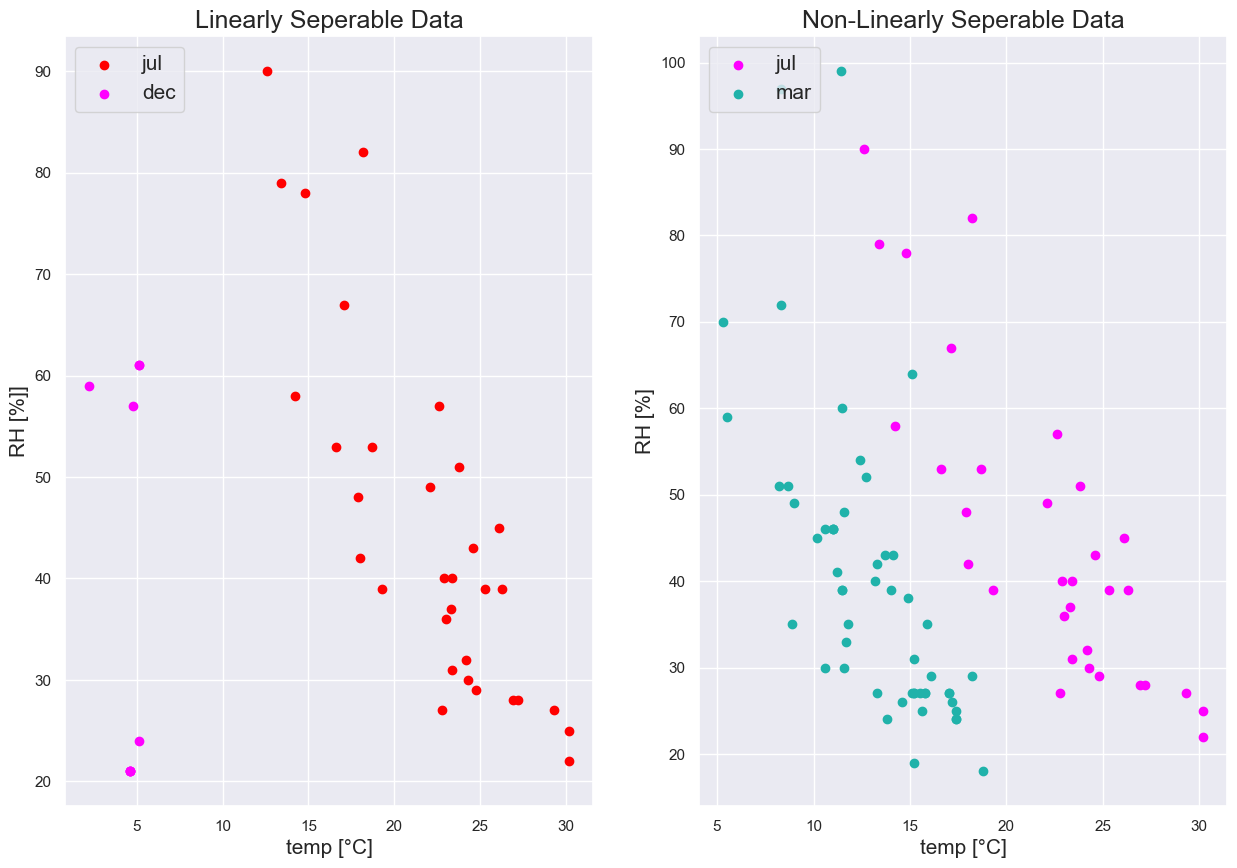

In [548]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set the Seaborn theme
sns.set_theme()

# Read the iris dataset into a pandas DataFrame object with seaborn
df = pd.read_csv("Datasets/forestfires.csv")

mar = df[df.month == "mar"]
aug = df[df.month == "aug"]
dec = df[df.month == "dec"]
octo = df[df.month == "oct"]
sep = df[df.month == "sep"]
jul = df[df.month == "jul"]
feb = df[df.month == "feb"]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

ax1.scatter(jul.temp, 
            jul.RH, 
            color = "red", 
            label = "jul")
ax1.scatter(dec.temp, 
            dec.RH, 
            color = "magenta", 
            label = "dec")
ax1.set_xlabel("temp [°C]", fontsize = 15)
ax1.set_ylabel("RH [%]]", fontsize = 15)
ax1.legend(fontsize = 15, loc = "upper left")
ax1.set_title("Linearly Seperable Data", fontsize = 18)


ax2.scatter(jul.temp, 
            jul.RH, 
            color = "magenta", 
            label = "jul")
ax2.scatter(mar.temp, 
            mar.RH, 
            color = "lightseagreen", 
            label = "mar")
ax2.set_xlabel("temp [°C]", fontsize = 15)
ax2.set_ylabel("RH [%]", fontsize = 15)
ax2.legend(fontsize = 15, loc = "upper left")
ax2.set_title("Non-Linearly Seperable Data", fontsize = 18)
plt.show()

## The Sigmoid Activation Function

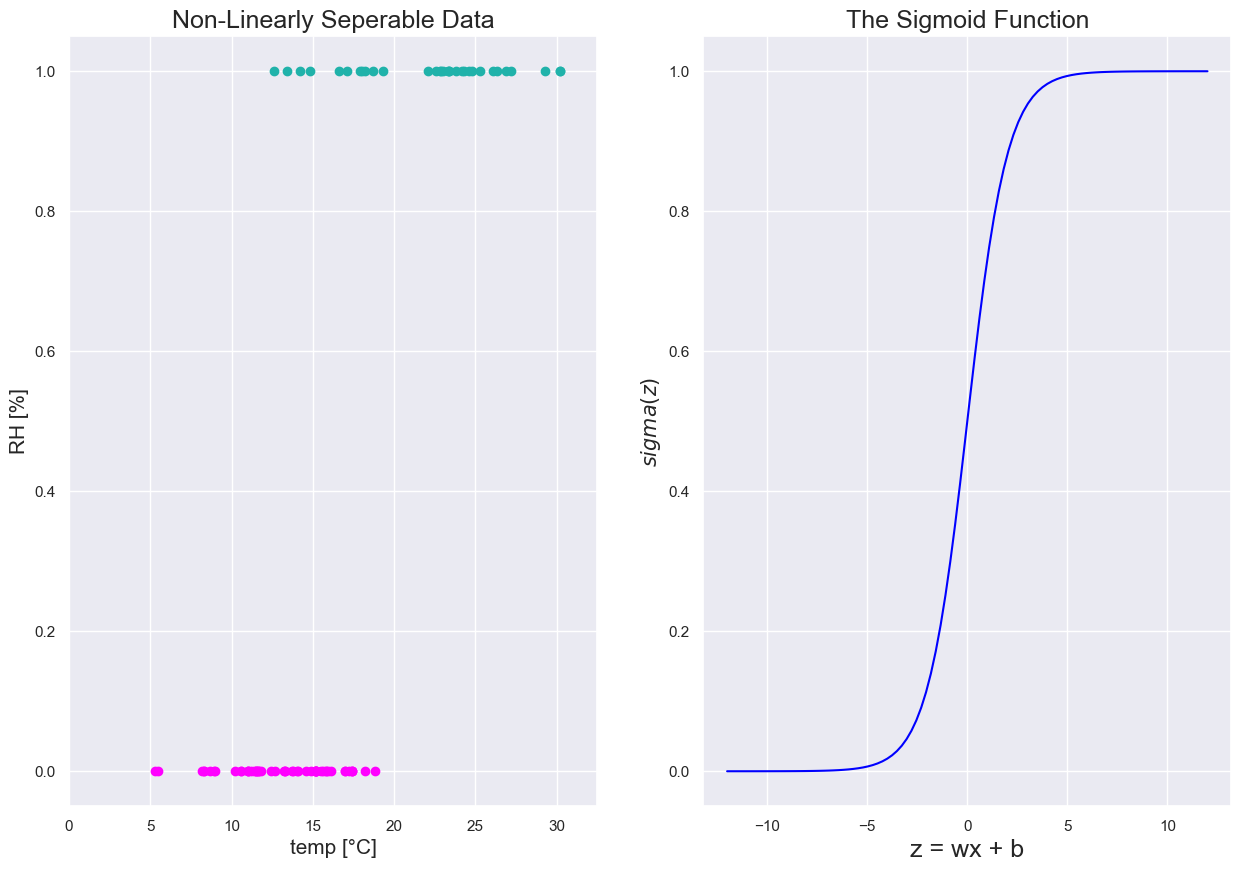

In [549]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

ax1.set_xlim((0,32.5))
ax1.scatter(mar.temp, 
            np.zeros(np.size(mar.temp)), 
            color = "magenta", 
            label = "mar")
ax1.scatter(jul.temp, 
            np.ones(np.size(jul.temp)), 
            color = "lightseagreen", 
            label = "jul")
ax1.set_xlabel("temp [°C]", fontsize = 15)
ax1.set_ylabel("RH [%]", fontsize = 15)
ax1.set_title("Non-Linearly Seperable Data", fontsize = 18)


domain = np.linspace(-12.0, 12.0, 100)
ax2.plot(domain, 
        sigmoid(domain), 
        color = "blue", 
        label = "$\sigma$(z)")
ax2.set_xlabel("z = wx + b", fontsize = 18)
ax2.set_ylabel("$sigma(z)$", fontsize = 15)
ax2.set_title("The Sigmoid Function", fontsize = 18)
plt.show()

## Designing a Single Neuron to Predict Probabilities

In [550]:
class SingleNeuron(object):
    """
    A class used to represent a single artificial neuron. 

    ...

    Attributes
    ----------
    activation_function : function
        The activation function applied to the preactivation linear combination.
    
    cost_function : function
        The cost function used to measure model performance.

    w_ : numpy.ndarray
        The weights and bias of the single neuron. The last entry being the bias. 
        This attribute is created when the train method is called.

    errors_: list
        A list containing the mean sqaured error computed after each iteration 
        of stochastic gradient descent per epoch. 

    Methods
    -------
    train(self, X, y, alpha = 0.005, epochs = 50)
        Iterates the stochastic gradient descent algorithm through each sample 
        a total of epochs number of times with learning rate alpha. The data 
        used consists of feature vectors X and associated labels y. 

    predict(self, X)
        Uses the weights and bias, the feature vectors in X, and the 
        activation_function to make a y_hat prediction on each feature vector. 
    """
    def __init__(self, activation_function, cost_function):
        self.activation_function = activation_function
        self.cost_function = cost_function

    def train(self, X, y, alpha, epochs):
   
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                error = (self.predict(xi) - target)
                self.w_[:-1] -= alpha*error*xi
                self.w_[-1] -= alpha*error
                #errors += .5*((self.predict(xi) - target)**2)
                errors += self.cost_function(self.predict(xi), target)
            self.errors_.append(errors/N)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)

    def plot_cost_function(self):
        fig, axs = plt.subplots(figsize = (10, 8))
        axs.plot(range(1, len(self.errors_) + 1), 
                self.errors_,
                label = "Cost function")
        axs.set_xlabel("epochs", fontsize = 15)
        axs.set_ylabel("Cost", fontsize = 15)
        axs.legend(fontsize = 15)
        axs.set_title("Cost Calculated after Epoch During Training", fontsize = 18)
        plt.show()

    def plot_decision_boundary(self, X, y, xstring="x", ystring="y"):
        plt.figure(figsize = (10, 8))
        plot_decision_regions(X, y, clf = self)
        plt.title("Neuron Decision Boundary", fontsize = 18)
        plt.xlabel(xstring, fontsize = 15)
        plt.ylabel(ystring, fontsize = 15)
        plt.show()

In [609]:
def cross_entropy_loss(y_hat, y):
    return - y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)

node = SingleNeuron(sigmoid, cross_entropy_loss)

X = df.iloc[100:].temp.values
X = X.reshape(-1, 1)
y = np.where(df.iloc[100:].month == "mar", 0, 1)

node.train(X, y, alpha = 0.01, epochs = 10000)

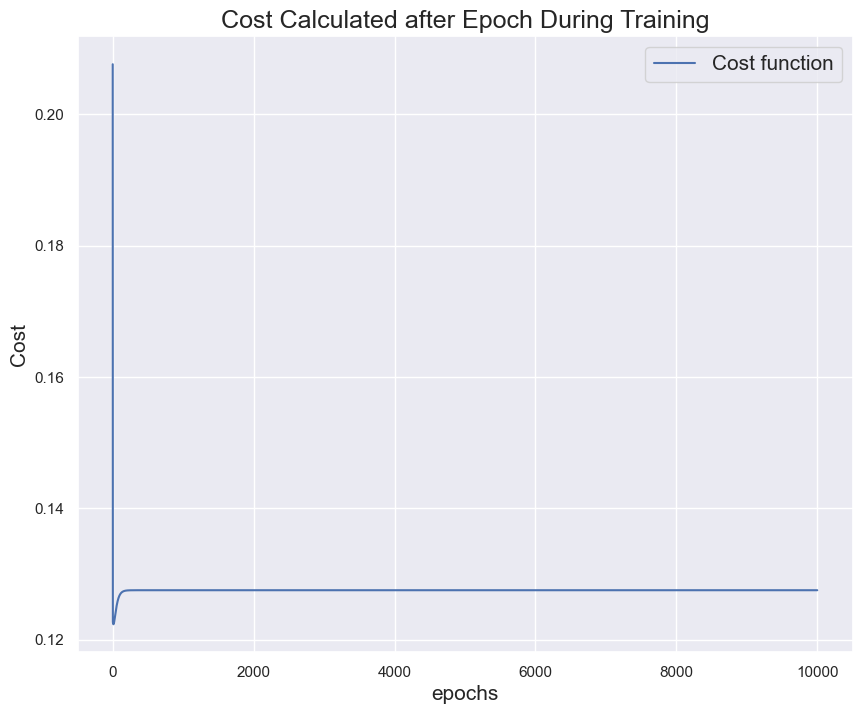

In [610]:
node.plot_cost_function()
plt.show()

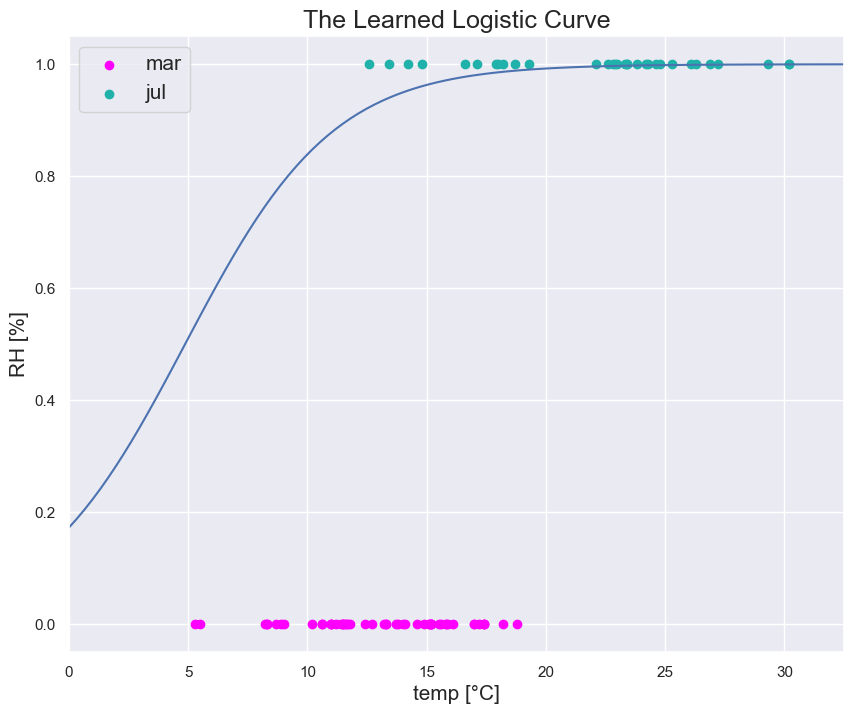

In [611]:
plt.figure(figsize = (10, 8))
plt.xlim((0, 32.5))

plt.scatter(mar.temp, 
            np.zeros(np.size(mar.temp)), 
            color = "magenta", 
            label = "mar")
plt.scatter(jul.temp, 
            np.ones(np.size(jul.temp)), 
            color = "lightseagreen", 
            label = "jul")

domain = np.linspace(0, 32.5, 100)
plt.plot(domain, node.predict(domain.reshape(-1, 1)))
plt.xlabel("temp [°C]", fontsize = 15)
plt.ylabel("RH [%]", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper left")
plt.title("The Learned Logistic Curve", fontsize = 18)
plt.show()

In [612]:
from mlxtend.plotting import plot_decision_regions

In [613]:
node.predict(X)

array([0.99189103, 0.95557989, 0.99263189, 0.99795563, 0.53487992,
       0.9256335 , 0.98650268, 0.99513887, 0.99308807, 0.98260785,
       0.94497276, 0.98884652, 0.99689678, 0.98919597, 0.9712298 ,
       0.96840546, 0.89728658, 0.96531376, 0.86360703, 0.99135654,
       0.85182929, 0.98087848, 0.99658328, 0.98515474, 0.99189103,
       0.99372026, 0.79094148, 0.9814729 , 0.97211563, 0.96740572,
       0.96740572, 0.94978321, 0.86360703, 0.98367442, 0.96193141,
       0.98367442, 0.9814729 , 0.96937551, 0.98561818, 0.99558432,
       0.99585846, 0.99735684, 0.99481733, 0.97761461, 0.99774885,
       0.99929227, 0.9359801 , 0.99802025, 0.98260785, 0.99767539,
       0.99727062, 0.99836735, 0.99825899, 0.99263189, 0.99965125,
       0.97616173, 0.99951891, 0.98733348, 0.99351618, 0.98953458,
       0.97380849, 0.99308807, 0.96531376, 0.98467661, 0.98467661,
       0.53487992, 0.97761461, 0.99744035, 0.95823351, 0.99391794,
       0.99585846, 0.98260785, 0.99263189, 0.98418332, 0.95276

In [614]:
np.rint(node.predict(X)) != y

array([False, False, False, False, False,  True,  True, False, False,
       False,  True,  True, False, False,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False,  True,
       False, False, False, False,  True,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False,  True,  True,  True, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False,

In [615]:
classification_error = (np.rint(node.predict(X)) != y).astype(int)
print(f"Classification Error = {sum(classification_error)/ len(y)}")

Classification Error = 0.11031175059952038


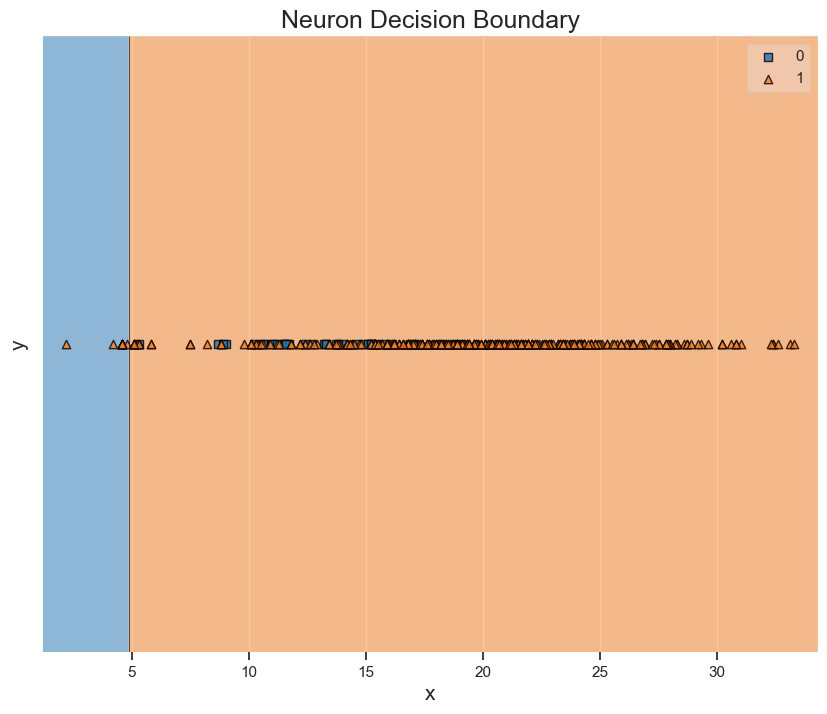

In [616]:
node.plot_decision_boundary(X, y)
plt.show()

## Logistic Regression Single Neuron with Multiple Inputs

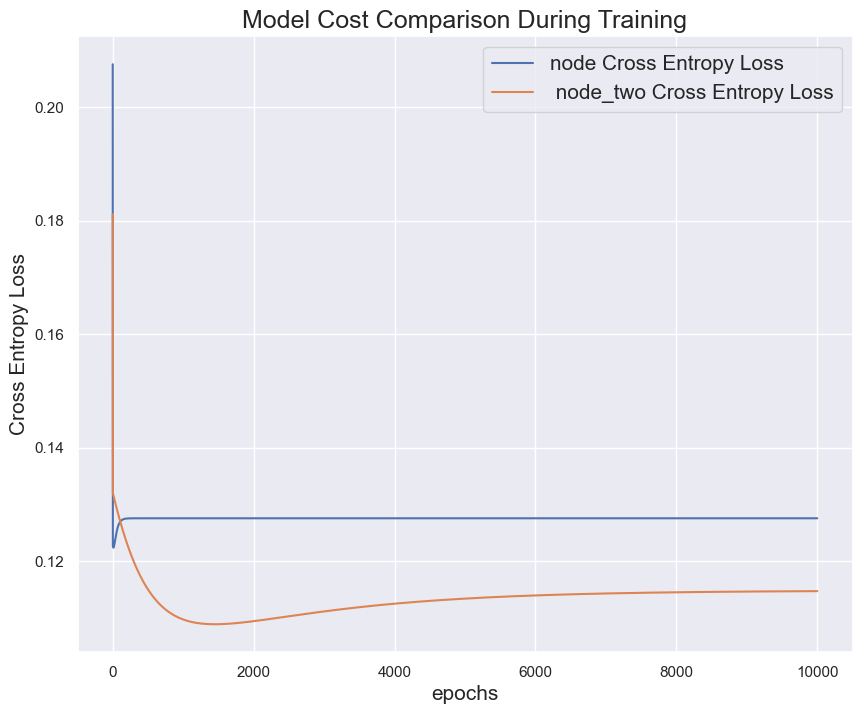

In [628]:
# Instantiate a new single neuron.
node_two = SingleNeuron(sigmoid, cross_entropy_loss)

# Create a numpy.ndarray of petal length and sepal length values for
# the versicolor and virginica flowers, respectively. 
X_two = df.iloc[100:][["temp", "RH"]].values

# Train the new single neuron model on the new feature vectors.
node_two.train(X_two, y, alpha = 0.0009, epochs = 10000)

plt.figure(figsize = (10, 8))
plt.plot(range(1, len(node.errors_) + 1), 
         node.errors_,
         label = "node Cross Entropy Loss")
plt.plot(range(1, len(node_two.errors_) + 1), 
         node_two.errors_,
         label = " node_two Cross Entropy Loss")
plt.xlabel("epochs", fontsize = 15)
plt.ylabel("Cross Entropy Loss", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("Model Cost Comparison During Training", fontsize = 18)


plt.show()

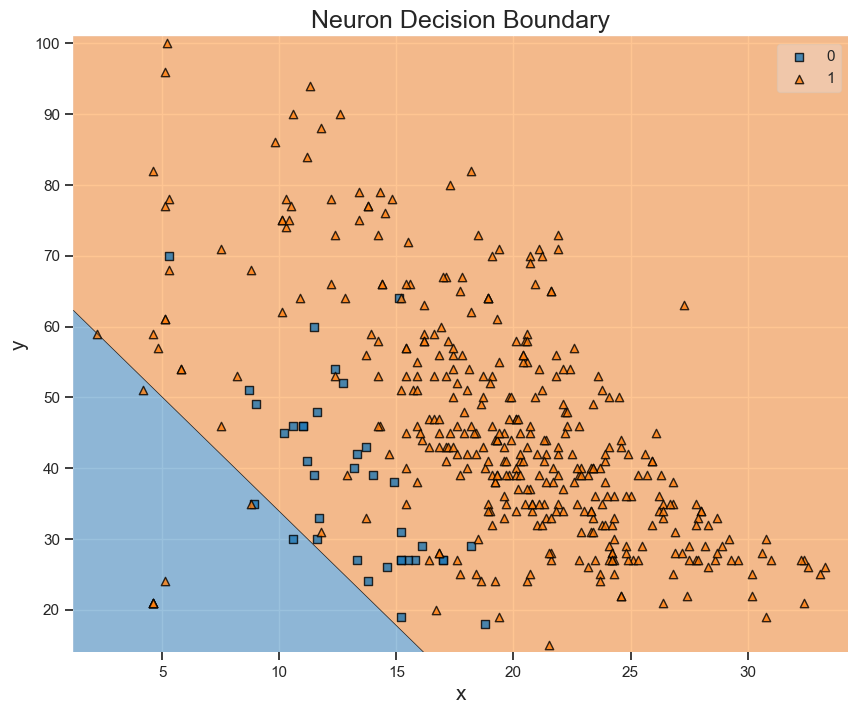

In [629]:
node_two.plot_decision_boundary(X_two, y)

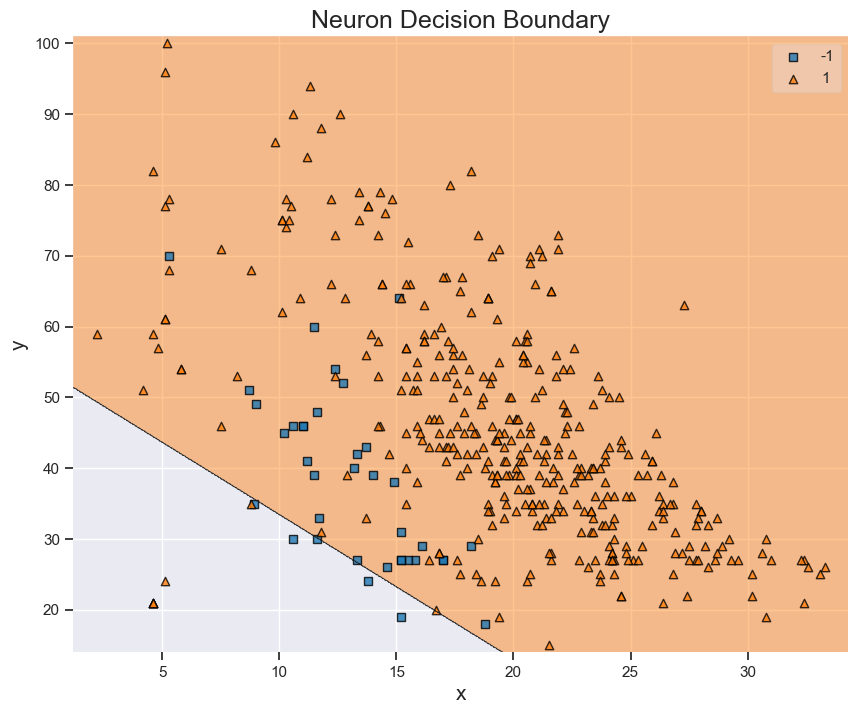

In [659]:
def sign(z):
    return np.sign(z)

def MSE(y_hat, y):
    return .5*(y_hat - y)**2

# Instantiate a new single neuron.
node_three = SingleNeuron(sign, MSE)

# Create a numpy.ndarray of petal length and sepal length values for
# the versicolor and virginica flowers, respectively. 
X_three = df.iloc[100:][["temp", "RH"]].values

y_three = np.where(df.iloc[100:]["month"] == "mar", -1, 1)


# Train the new single neuron model on the new feature vectors.
node_three.train(X_three, y_three, alpha = 0.01, epochs = 10000)

node_three.plot_decision_boundary(X_three, y_three)
plt.show()

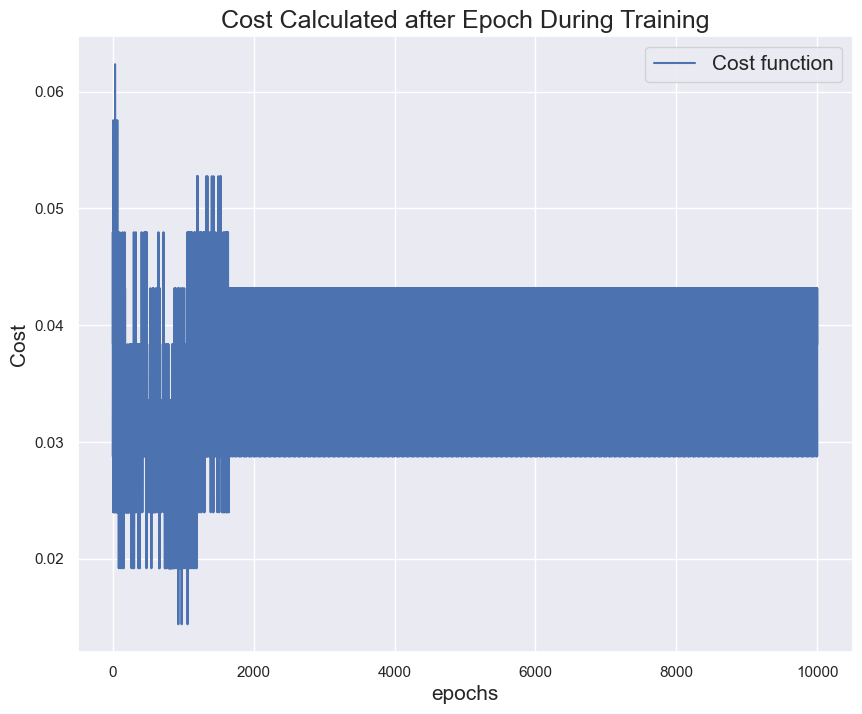

In [660]:
node_three.plot_cost_function()

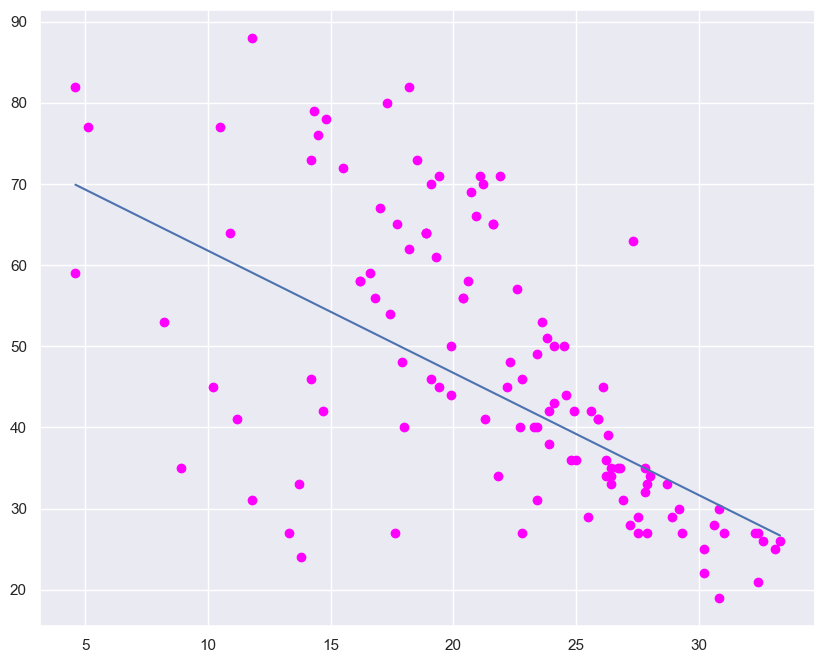

In [661]:
def linear(z):
    return z

# Instantiate a new single neuron.
node_four = SingleNeuron(linear, MSE)

# Create a numpy.ndarray of petal length and sepal length values for
# the versicolor and virginica flowers, respectively. 
X_four = df.iloc[400:]["temp"].values
X_four = X_four.reshape(-1, 1)

y_four = df.iloc[400:]["RH"].values


# Train the new single neuron model on the new feature vectors.
node_four.train(X_four, y_four, alpha = 0.001, epochs = 10000)

plt.figure(figsize = (10, 8))
plt.scatter(X_four, y_four, label = "dec", color = "magenta")

domain = np.linspace(np.min(X_four), np.max(X_four), 50)
plt.plot(domain, node_four.predict(domain.reshape(-1, 1)), label = "regression line")
plt.show()